In [15]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [16]:
api_key = '36N2WM8I8W74IFZ0'

In [17]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='MSFT', outputsize = 'full')
data = data.reindex(index=data.index[::-1])
print(data)

            1. open  2. high  3. low  4. close   5. volume
date                                                      
1999-11-01   93.250    94.19   92.12     92.37  26630600.0
1999-11-02   92.750    94.50   91.94     92.56  23174500.0
1999-11-03   92.940    93.50   91.50     92.00  22258500.0
1999-11-04   92.310    92.75   90.31     91.75  27119700.0
1999-11-05   91.810    92.87   90.50     91.56  35083700.0
...             ...      ...     ...       ...         ...
2021-05-21  247.565   248.33  244.74    245.17  21863058.0
2021-05-24  247.785   251.16  247.51    250.78  21411547.0
2021-05-25  251.769   252.75  250.82    251.72  17704303.0
2021-05-26  251.430   252.94  250.75    251.49  17771600.0
2021-05-27  251.170   251.48  249.25    249.31  24426244.0

[5428 rows x 5 columns]


In [18]:
close_data = data['4. close']
print(close_data)

date
1999-11-01     92.37
1999-11-02     92.56
1999-11-03     92.00
1999-11-04     91.75
1999-11-05     91.56
               ...  
2021-05-21    245.17
2021-05-24    250.78
2021-05-25    251.72
2021-05-26    251.49
2021-05-27    249.31
Name: 4. close, Length: 5428, dtype: float64


In [19]:
close_data = np.array(close_data)

x_test, x_train = close_data[5000:], close_data[0:5000]

In [6]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model = AR(x_train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

history = x_train[len(x_train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(x_test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = x_test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
    
error = mean_squared_error(x_test, predictions)
print('Test MSE: %.3f' % error)

predicted=631.091077, expected=619.600000
predicted=621.199456, expected=619.500000
predicted=619.831161, expected=619.990000
predicted=620.389675, expected=619.140000
predicted=620.972470, expected=624.360000
predicted=625.813864, expected=621.370000
predicted=622.475157, expected=618.430000
predicted=619.680157, expected=623.175000
predicted=624.226507, expected=617.890000
predicted=619.567381, expected=604.457500
predicted=605.835110, expected=607.840000
predicted=608.069399, expected=609.110000
predicted=610.565412, expected=608.480000
predicted=610.284900, expected=607.750000
predicted=608.623152, expected=606.990000
predicted=608.135703, expected=607.280000
predicted=609.982945, expected=607.200000
predicted=608.760967, expected=605.750000
predicted=605.920911, expected=604.710000
predicted=606.008340, expected=604.700000
predicted=606.846583, expected=602.110000
predicted=602.943687, expected=603.545300
predicted=603.690744, expected=600.500000
predicted=602.519187, expected=600

C:\Users\А\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels

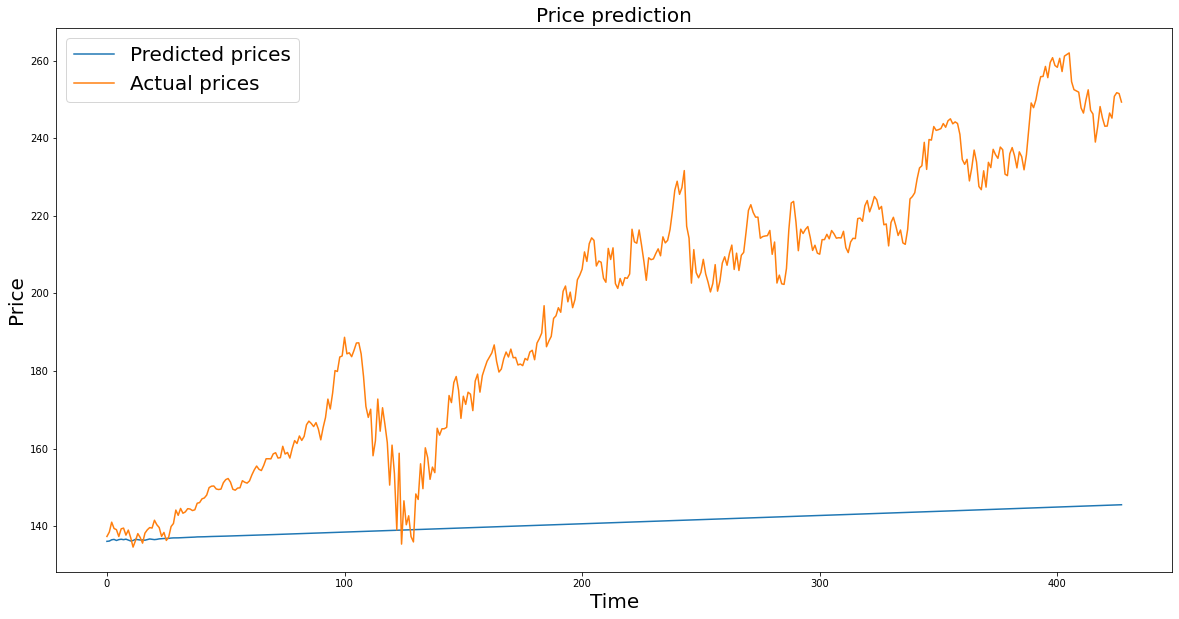

In [29]:
plt.figure(figsize=(20,10))
plt.plot(predictions, label="Predicted prices")
plt.plot(x_test, label="Actual prices")
plt.title(f'Price prediction', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [28]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model = AR(x_train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(x_train), end=len(x_train)+len(x_test)-1, dynamic=True)
#predictions = model_fit.predict(start=len(x_train), end=len(x_train)+90, dynamic=True)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], x_test[i]))

error = mean_squared_error(x_test, predictions)
print('Test MSE: %.3f' % error)

Lag: 32
Coefficients: [-0.00112079  0.94682901  0.03171409 -0.00525409 -0.0058648   0.06261639
  0.00250902 -0.01473716 -0.06049952  0.03923897  0.01890425 -0.02796835
  0.03289601 -0.00212197  0.00973807 -0.0094818  -0.01073477 -0.03449088
 -0.00147654 -0.00945179  0.0726164  -0.08408018  0.03751555 -0.01620317
  0.00708585  0.00395162  0.01639791 -0.01697454 -0.01355924  0.00716563
  0.03261343 -0.03200064  0.02330938]
predicted=136.129089, expected=137.390000
predicted=136.201397, expected=138.520000
predicted=136.531966, expected=141.070000
predicted=136.628623, expected=139.440000
predicted=136.355275, expected=139.140000
predicted=136.571677, expected=137.380000
predicted=136.675257, expected=139.360000
predicted=136.559544, expected=139.540000
predicted=136.690486, expected=137.730000
predicted=136.473255, expected=139.030000
predicted=136.229500, expected=137.070000
predicted=136.343289, expected=134.650000
predicted=136.656198, expected=136.280000
predicted=136.578476, expecte

C:\Users\А\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels